In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

To estimate the gradient w.r.t distribution parameters, of the expectation of a function w.r.t that distribution  - $\newline$
$\nabla_{\theta} \mathrm{E}_{p_{\theta}(x)}[f(x,\phi)]$ $\newline$
Multiple estimators exist - $\newline$
Score function estimator - $\nabla_{\theta} \mathrm{E}_{p_{\theta}(x)}[f(x,\phi)] = 
\mathrm{E}_{p_{\theta}(x)}[f(x,\phi)\nabla_{\theta}\log p_{\theta}(x)] \approx
\dfrac{1}{N}\sum_{i}^{N}f(\hat{x}_i, \phi)\nabla_{\theta}\log p_{\theta}(\hat{x}_i)$

Score function estimator with $f(x) = k$ and $p_\theta (x) = \mathcal{N}(x|\mu, \sigma^2)$ where $\theta = \lbrace \mu, \sigma^2 \rbrace $ - $\newline$
$\nabla_{\mu} \mathrm{E}_{p_{\theta}(x)}[f(x,\phi)] = 
\mathrm{E}_{\mathcal{N}(x|\mu, \sigma^2)}[k\nabla_{\mu}\log \mathcal{N}(x|\mu, \sigma^2)] =
\mathrm{E}_{\mathcal{N}(x|\mu, \sigma^2)}[k\frac{(x - \mu)}{\sigma^2}] \approx 
\dfrac{1}{N}\sum_{i}^{N}k \frac{(\hat{x}_i - \mu)}{\sigma^2}$ where $\hat{x}_i \sim \mathcal{N}(x|\mu, \sigma^2)$ $\newline$
$\nabla_{\sigma^2} \mathrm{E}_{p_{\theta}(x)}[f(x,\phi)] = 
\mathrm{E}_{\mathcal{N}(x|\mu, \sigma^2)}[k\nabla_{\sigma^2}\log \mathcal{N}(x|\mu, \sigma^2)] =
\mathrm{E}_{\mathcal{N}(x|\mu, \sigma^2)}[k\frac{(x - \mu)^2}{\sigma^3}] \approx
\dfrac{1}{N}\sum_{i}^{N}k \frac{(\hat{x}_i - \mu)^2}{\sigma^3}$ where $\hat{x}_i \sim \mathcal{N}(x|\mu, \sigma^2)$

In [54]:
def objective(x):
    if type(x) == list:
        return [100 for val in x]
    elif type(x) == np.ndarray:
        return np.array([100 for val in x])
    else:
        return 100

-0.32531115234816216


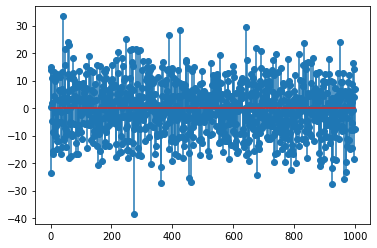

In [65]:
# distribution parameters
mean = 5
var = 10
# samples per estimate of gradient
N = 100
# number of independent estimates
n_trials = 1000
dE_mean = []
for i in range(n_trials):
    xh = mean + var*np.random.randn(N)
    dE_mean_i =  objective(xh)*(xh - mean)/var
    dE_mean.append(dE_mean_i.mean())
# the mean of the independent estimates should converge to the true value of the gradient
EdE_mean = np.mean(dE_mean)
plt.stem(dE_mean)
print(EdE_mean)